In [150]:
from pathlib import Path
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt

data_path = Path('/home/mark/code/COVID-19/csse_covid_19_data')
yesterday = date.today() - timedelta(1)
today_path = Path(data_path, 'csse_covid_19_daily_reports', f"{yesterday.strftime('%m-%d-%Y')}.csv")
ts_deaths = Path(data_path, 'csse_covid_19_time_series', 'time_series_19-covid-Deaths.csv')
ts_confirm = Path(data_path, 'csse_covid_19_time_series', 'time_series_19-covid-Confirmed.csv')
ts_recover = Path(data_path, 'csse_covid_19_time_series', 'time_series_19-covid-Recovered.csv')

In [151]:
df = pd.read_csv(today_path)
df.head(3)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-13T11:09:03,67786,3062,51553,30.9756,112.2707
1,Guangdong,China,2020-03-13T11:09:03,1356,8,1296,23.3417,113.4244
2,Henan,China,2020-03-11T08:13:09,1273,22,1249,33.8820,113.6140


In [152]:
df['Country/Region'].unique()

array(['China', 'Panama', 'Australia', 'Croatia', 'Burkina Faso',
       'Albania', 'Canada', 'United Kingdom', 'Philippines', 'Nepal',
       'Sri Lanka', 'United Arab Emirates', 'Thailand', 'Cambodia',
       'San Marino', 'Germany', 'Congo (Kinshasa)', 'Honduras', 'US',
       'Algeria', 'Reunion', 'Oman', 'Cruise Ship', 'Italy', 'Iraq',
       'Lebanon', 'Ukraine', 'Austria', 'Switzerland', 'Ireland',
       'Georgia', 'Bangladesh', 'Kuwait', 'North Macedonia', 'Brazil',
       'Greece', 'Sweden', 'Pakistan', 'Norway', 'France', 'Turkey',
       'Bahrain', 'Iceland', 'Ecuador', 'Estonia', 'Denmark',
       'Netherlands', 'Cuba', 'Nigeria', 'Lithuania', 'New Zealand',
       'Belarus', 'Azerbaijan', 'Armenia', 'Kazakhstan', 'Iran', 'Israel',
       'Cayman Islands', 'Japan', 'Czechia', 'Qatar', 'Singapore',
       'Guadeloupe', 'Dominican Republic', 'Egypt', 'Bolivia',
       'Indonesia', 'Korea, South', 'Latvia', 'Senegal', 'Ethiopia',
       'Sudan', 'Portugal', 'Andorra', 'Guinea

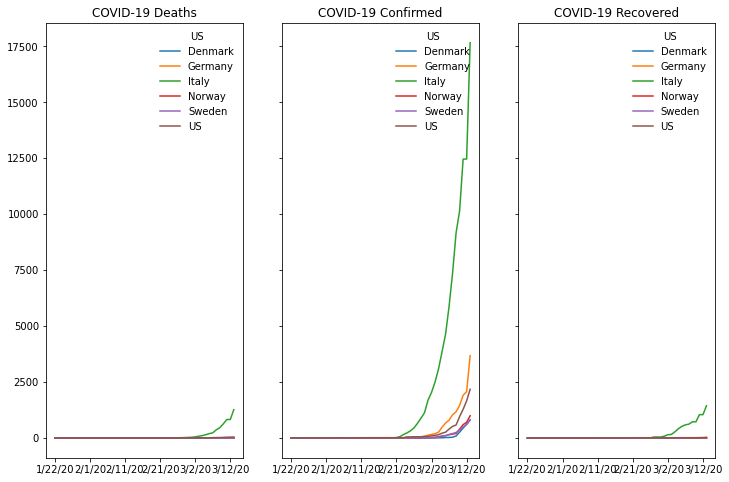

In [159]:
# Define the time-series data
ts_d_df = pd.read_csv(ts_deaths)
ts_c_df = pd.read_csv(ts_confirm)
ts_r_df = pd.read_csv(ts_recover)
dfs = [ts_d_df, ts_c_df, ts_r_df]
titles = ['COVID-19 Deaths','COVID-19 Confirmed','COVID-19 Recovered']

#Generate the function to plot US vs. China
def get_plot(title: list, dfs: list):
    cnt = 0
    
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 8), sharey=True)
    for df in dfs:
        country_df = df.groupby(['Country/Region']).sum()
        #print(country_df['Mainland China'])
        for idx, row in country_df.iterrows():
#             if 'China' in idx or 'US' in idx or 'Norway' in idx or 'Sweden' in idx:
            if 'Germany' in idx or 'US' in idx or 'Norway' in idx or 'Sweden' in idx or 'Denmark' in idx or 'Italy' in idx:

                row = row.drop(labels=['Lat', 'Long'], axis=0)
                ax1 = row.plot(ax=axes[cnt])
                ax1.legend(loc="upper right", title=f"{idx}", frameon=False)
                ax1.set_title(title[cnt])
        cnt += 1

get_plot(titles, dfs)


In [161]:
country_data = [{
    'country':'US',
    'population': 308745538
},{
    'country':'Denmark',
    'population': 5822763
},{
    'country':'Germany',
    'population': 83042200
},{
    'country':'Italy',
    'population': 60391000
},{
    'country':'Norway',
    'population': 5367580
},{
    'country':'Sweden',
    'population': 10327600
},{
    'country':'China',
    'population': 1427647786  
}]